11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         173,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,930 (679.41 KB)

 Trainable params: 173,930 (679.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.8225 - loss: 0.6876 - val_accuracy: 0.9633 - val_loss: 0.1319
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9653 - loss: 0.1194 - val_accuracy: 0.9737 - val_loss: 0.0888
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9773 - loss: 0.0768 - val_accuracy: 0.9788 - val_loss: 0.0744
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9848 - loss: 0.0537 - val_accuracy: 0.9802 - val_loss: 0.0662
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9871 - loss: 0.0449 - val_accuracy: 0.9818 - val_loss: 0.0656
Pérdida en prueba: 0.05748533457517624
Precisión en prueba: 0.9815000295639038


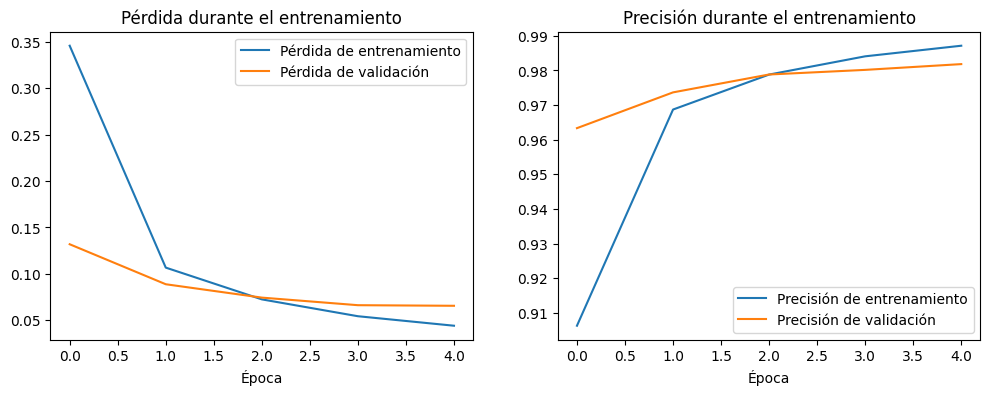

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Cargar y preparar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Redimensionar para agregar un canal (grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convertir las etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construir el modelo de la red convolucional
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()

# Definir el callback EarlyStopping con menor paciencia
early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=5,  # Menos épocas
    validation_split=0.2,
    callbacks=[early_stop]  # Añadir el callback al entrenamiento
)

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Pérdida en prueba: {test_loss}")
print(f"Precisión en prueba: {test_accuracy}")

# Guardar el modelo en el formato nativo de Keras
model.save("mnist_cnn_model_simplified.keras")

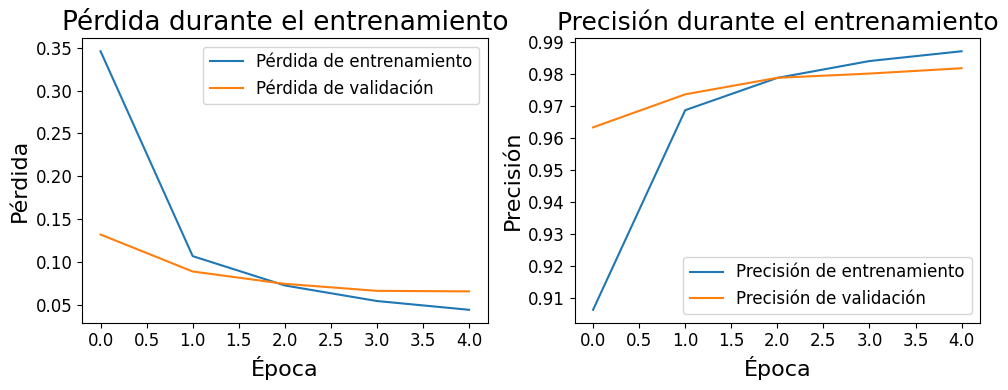

In [7]:
# Visualizar las curvas de pérdida y precisión con títulos más grandes
plt.figure(figsize=(10, 4))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend(fontsize=12)  # Aumentar tamaño de la leyenda
plt.title("Pérdida durante el entrenamiento", fontsize=19)  # Título más grande
plt.xlabel("Época", fontsize=16)  # Etiqueta del eje X más grande
plt.ylabel("Pérdida", fontsize=16)  # Etiqueta del eje Y más grande
plt.xticks(fontsize=12)  # Tamaño de los valores en el eje X
plt.yticks(fontsize=12)  # Tamaño de los valores en el eje Y

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.legend(fontsize=12)  # Aumentar tamaño de la leyenda
plt.title("Precisión durante el entrenamiento", fontsize=18)  # Título más grande
plt.xlabel("Época", fontsize=16)  # Etiqueta del eje X más grande
plt.ylabel("Precisión", fontsize=16)  # Etiqueta del eje Y más grande
plt.xticks(fontsize=12)  # Tamaño de los valores en el eje X
plt.yticks(fontsize=12)  # Tamaño de los valores en el eje Y

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

In [ ]:
!ls -lh mnist_cnn_model_simplified.keras

-rw-r--r-- 1 root root 2.1M Dec 13 19:18 mnist_cnn_model_simplified.keras


In [ ]:
from google.colab import files
files.download("mnist_cnn_model_simplified.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


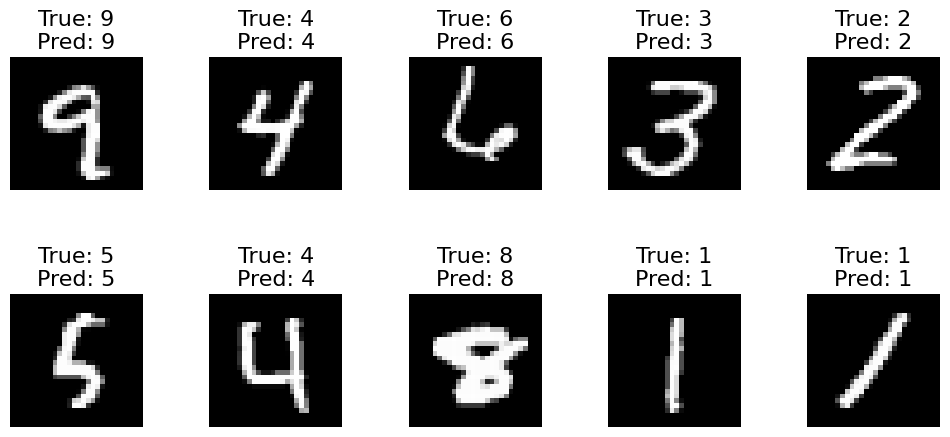

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Selección aleatoria de 10 imágenes
np.random.seed(6100146)  # Para asegurar reproducibilidad
indices_aleatorios = np.random.choice(x_test.shape[0], 10, replace=False)  # Elegir 10 índices aleatorios

sample_images = x_test[indices_aleatorios]  # Extraer las imágenes correspondientes
sample_labels = y_test[indices_aleatorios]  # Etiquetas verdaderas correspondientes

# Redimensionar las imágenes para agregar un canal (grayscale) - 4D
sample_images_4d = sample_images.reshape((-1, 28, 28, 1))

# Hacer predicciones sobre las 10 imágenes seleccionadas
predictions = model.predict(sample_images_4d)

# Convertir las probabilidades a las clases predichas
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las imágenes con las etiquetas verdaderas y las predicciones
plt.figure(figsize=(12, 5))  # Ajustar tamaño para que el texto no se sobreponga

for i in range(10):
    plt.subplot(2, 5, i + 1)  # Usar una cuadrícula de 2 filas y 5 columnas
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')  # Mostrar imagen en escala de grises
    plt.title(f"True: {np.argmax(sample_labels[i])}\nPred: {predicted_classes[i]}", fontsize=16)  # Títulos más grandes
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.6)  # Ajustar espacios entre imágenes
plt.show()